## Setup

In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_CSV = '/home/jovyan/data/spout_cores_train_overlaps_len_var.csv'
OUTPUT = '/home/jovyan/data/export_spout_train.csv'
CSV_DELIMETER = ';'
PATCH_SIZES = [10, 50, 80, 200]

## Load data:

In [3]:
with open(DATA_CSV, newline='') as f:
    reader = csv.reader(f, delimiter=CSV_DELIMETER)
    data = list(reader)

data[0]

['seq',
 'patch_10_preds',
 'patch_10_min_pos_start',
 'patch_10_min_pos_end',
 'patch_10_min_pred',
 'patch_50_preds',
 'patch_50_min_pos_start',
 'patch_50_min_pos_end',
 'patch_50_min_pred',
 'patch_80_preds',
 'patch_80_min_pos_start',
 'patch_80_min_pos_end',
 'patch_80_min_pred',
 'patch_200_preds',
 'patch_200_min_pos_start',
 'patch_200_min_pos_end',
 'patch_200_min_pred',
 'real_start',
 'real_end']

In [4]:
scores_df = pd.DataFrame(data[1:], columns=data[0])
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,patch_80_min_pos_start,patch_80_min_pos_end,patch_80_min_pred,patch_200_preds,patch_200_min_pos_start,patch_200_min_pos_end,patch_200_min_pred,real_start,real_end
0,MANLYVALLHFPMRDRQGRVVATALTPIDVPDIARTARTYGAKRYY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",138.0,148.0,0.9393268823623657,"[1.0, 0.999984860420227, 0.9999608993530273, 0...",107.0,157.0,0.5523017644882202,"[1.0, 0.9999761581420898, 0.9999455213546753, ...",107.0,187.0,0.46520012617111206,"[1.0, 0.7025175094604492, 0.702517569065094, 0...",36.0,236.0,0.08085142821073532,106,153
1,MAKVYIALLHYPVYNKKKKVITTCITGFDLHDIARSALTYGITRYY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",132.0,142.0,0.0005802377127110958,"[1.0, 0.9999953508377075, 0.9999873638153076, ...",107.0,157.0,1.4883577023283578e-05,"[1.0, 0.9999998807907104, 0.9999998807907104, ...",107.0,187.0,5.301210330799222e-05,"[1.0, 0.7025175094604492, 0.702517569065094, 0...",107.0,307.0,0.00794434268027544,104,150
2,MSPERFARINQMLDNRQVDLTVCLDKVHMTNNIAAVLRSADCVGIH...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",119.0,129.0,0.9997366070747375,"[1.0, 0.9999998807907104, 0.9999998807907104, ...",119.0,169.0,0.00010487087274668738,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",95.0,175.0,0.0003739665262401104,"[1.0, 0.016054000705480576, 0.0239471960812807...",0.0,200.0,0.016054000705480576,95,137
3,MATLTLALYNTYDTKRLHEAHLRAIARAAPIAYAYGFHLALVGFPL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",128.0,138.0,0.999984622001648,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",90.0,140.0,0.9992721676826477,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",57.0,137.0,0.8600448966026306,"[1.0, 0.7025175094604492, 0.702517569065094, 0...",30.0,230.0,0.11376293748617172,98,146
4,MRNKVYLSLVHYPVYNRNKDIVCTSVTNFDIHDISRSCGTYEIKGY...,"[0.9999996423721313, 0.999998927116394, 0.9999...",140.0,150.0,5.570997473114403e-06,"[0.9999996423721313, 0.9999500513076782, 0.999...",105.0,155.0,9.867212611425202e-06,"[0.9999996423721313, 0.9999951124191284, 0.999...",63.0,143.0,5.1266251830384135e-05,"[0.9999996423721313, 0.7025175094604492, 0.702...",142.0,342.0,0.01206495426595211,110,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,MLDKVYVALIHYPILKKDGTIVSTAVTNFDVHDISRSCKTYNIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",141.0,151.0,0.005086097400635481,"[1.0, 0.9999971389770508, 0.9999986886978149, ...",141.0,191.0,0.0024046653416007757,"[1.0, 0.9999878406524658, 0.9999966621398926, ...",69.0,149.0,0.005646190606057644,"[1.0, 0.7012602090835571, 0.702517569065094, 0...",141.0,341.0,0.075282983481884,110,158
889,MTPPVNLVLINPKKSPDISEDNRRLISRIAPVCLAYNFHLWLIDFG...,"[0.9999998807907104, 0.9999997615814209, 0.999...",79.0,89.0,4.580023232847452e-05,"[0.9999998807907104, 0.9999631643295288, 0.999...",70.0,120.0,8.888603701961983e-07,"[0.9999998807907104, 0.9970359802246094, 0.911...",38.0,118.0,1.3956669135950506e-06,"[0.9999998807907104, 0.7012602090835571, 0.702...",56.0,256.0,0.034801777452230453,94,145
890,MVEVFVVLNNVSSPQRLLDTAKVTYSANMSFVKGFIAVKVTGMAAQ...,"[0.9999995231628418, 0.9999982118606567, 0.999...",109.0,119.0,0.0004389072419144213,"[0.9999995231628418, 0.9961442947387695, 0.990...",50.0,100.0,8.120458971916378e-08,"[0.9999995231628418, 0.18446411192417145, 0.39...",21.0,101.0,2.4229855171142844e-06,"[0.9999995231628418, 0.7012602090835571, 0.702...",46.0,246.0,0.0685376301407814,83.0,126.0
891,MKAIEADVYLGLVHNPIYNKLGEVITTTVTNYDLHDISRAAKTYEI...,"[0.9999898672103882, 0.9999785423278809, 0.999...",146.0,156.0,3.073470793424349e-07,"[0.9999898672103882, 0.9997072815895081, 0.999...",145.0,195.0,8.602067964602611e-07,"[0.9999898672103882, 0.9999972581863403, 0.999...",114.0,194.0,7.323127647396177e-06,"[0.9999898672103882, 0.7012602090835571, 0.702...",145.0,345.0,0.001732530421577394,

In [5]:
scores_df.iloc[200]['seq']

'MIVKTPLGLERIVASRIEELGVRCRVTAKPGGYPGIVAVDSVLDEEKVELAERIKREIPEAERVLVSQEVVEAEEDEIVEAALRISRRSLNRDTSFAVRTVRRGSHRYRSVDINHRVGAAVVREVDAPVDLEYPDKILWVEIIDDLAALGVLDGREVWRKRSPEKRDVRRFFSRASVVQMPYLGPRDAARSMGSRIGRAVQMFEVGELVIAVAGAVDARQLGWFIQGVLEGVESRFRVQQRTYAHKPRRVEVRVQDLYQLVRDRRGEPKVVFEPEGEAFPSVAGRLADLFLSGEERINLFFGSREGIPKGIFRLADLIIDLCPGITLSTEYAASSALIGIAFALEEKIKDQE'

Fix format (str -> numeric):

In [6]:
for patch_size in PATCH_SIZES:
    scores_df[f'patch_{patch_size}_min_pos_start'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pos_start'])
    scores_df[f'patch_{patch_size}_min_pos_end'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pos_end'])
    scores_df[f'patch_{patch_size}_min_pred'] = pd.to_numeric(scores_df[f'patch_{patch_size}_min_pred'])
scores_df['real_start'] = pd.to_numeric(scores_df['real_start'])
scores_df['real_end'] = pd.to_numeric(scores_df['real_end'])
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,patch_80_min_pos_start,patch_80_min_pos_end,patch_80_min_pred,patch_200_preds,patch_200_min_pos_start,patch_200_min_pos_end,patch_200_min_pred,real_start,real_end
0,MANLYVALLHFPMRDRQGRVVATALTPIDVPDIARTARTYGAKRYY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",138.0,148.0,9.393269e-01,"[1.0, 0.999984860420227, 0.9999608993530273, 0...",107.0,157.0,5.523018e-01,"[1.0, 0.9999761581420898, 0.9999455213546753, ...",107.0,187.0,0.465200,"[1.0, 0.7025175094604492, 0.702517569065094, 0...",36.0,236.0,0.080851,106.0,153.0
1,MAKVYIALLHYPVYNKKKKVITTCITGFDLHDIARSALTYGITRYY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",132.0,142.0,5.802377e-04,"[1.0, 0.9999953508377075, 0.9999873638153076, ...",107.0,157.0,1.488358e-05,"[1.0, 0.9999998807907104, 0.9999998807907104, ...",107.0,187.0,0.000053,"[1.0, 0.7025175094604492, 0.702517569065094, 0...",107.0,307.0,0.007944,104.0,150.0
2,MSPERFARINQMLDNRQVDLTVCLDKVHMTNNIAAVLRSADCVGIH...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",119.0,129.0,9.997366e-01,"[1.0, 0.9999998807907104, 0.9999998807907104, ...",119.0,169.0,1.048709e-04,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",95.0,175.0,0.000374,"[1.0, 0.016054000705480576, 0.0239471960812807...",0.0,200.0,0.016054,95.0,137.0
3,MATLTLALYNTYDTKRLHEAHLRAIARAAPIAYAYGFHLALVGFPL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",128.0,138.0,9.999846e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",90.0,140.0,9.992722e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",57.0,137.0,0.860045,"[1.0, 0.7025175094604492, 0.702517569065094, 0...",30.0,230.0,0.113763,98.0,146.0
4,MRNKVYLSLVHYPVYNRNKDIVCTSVTNFDIHDISRSCGTYEIKGY...,"[0.9999996423721313, 0.999998927116394, 0.9999...",140.0,150.0,5.570997e-06,"[0.9999996423721313, 0.9999500513076782, 0.999...",105.0,155.0,9.867213e-06,"[0.9999996423721313, 0.9999951124191284, 0.999...",63.0,143.0,0.000051,"[0.9999996423721313, 0.7025175094604492, 0.702...",142.0,342.0,0.012065,110.0,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,MLDKVYVALIHYPILKKDGTIVSTAVTNFDVHDISRSCKTYNIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",141.0,151.0,5.086097e-03,"[1.0, 0.9999971389770508, 0.9999986886978149, ...",141.0,191.0,2.404665e-03,"[1.0, 0.9999878406524658, 0.9999966621398926, ...",69.0,149.0,0.005646,"[1.0, 0.7012602090835571, 0.702517569065094, 0...",141.0,341.0,0.075283,110.0,158.0
889,MTPPVNLVLINPKKSPDISEDNRRLISRIAPVCLAYNFHLWLIDFG...,"[0.9999998807907104, 0.9999997615814209, 0.999...",79.0,89.0,4.580023e-05,"[0.9999998807907104, 0.9999631643295288, 0.999...",70.0,120.0,8.888604e-07,"[0.9999998807907104, 0.9970359802246094, 0.911...",38.0,118.0,0.000001,"[0.9999998807907104, 0.7012602090835571, 0.702...",56.0,256.0,0.034802,94.0,145.0
890,MVEVFVVLNNVSSPQRLLDTAKVTYSANMSFVKGFIAVKVTGMAAQ...,"[0.9999995231628418, 0.9999982118606567, 0.999...",109.0,119.0,4.389072e-04,"[0.9999995231628418, 0.9961442947387695, 0.990...",50.0,100.0,8.120459e-08,"[0.9999995231628418, 0.18446411192417145, 0.39...",21.0,101.0,0.000002,"[0.9999995231628418, 0.7012602090835571, 0.702...",46.0,246.0,0.068538,83.0,126.0
891,MKAIEADVYLGLVHNPIYNKLGEVITTTVTNYDLHDISRAAKTYEI...,"[0.9999898672103882, 0.9999785423278809, 0.999...",146.0,156.0,3.073471e-07,"[0.9999898672103882, 0.9997072815895081, 0.999...",145.0,195.0,8.602068e-07,"[0.9999898672103882, 0.9999972581863403, 0.999...",114.0,194.0,0.000007,"[0.9999898672103882, 0.7012602090835571, 0.702...",145.0,345.0,0.001733,113.0,161.0


## Calculate overlaps of knot core predictions with real knot core intervals:

In [7]:
# https://stackoverflow.com/questions/2953967/built-in-function-for-computing-overlap-in-python

# what percentage of the predicted interval is actually in the knot core: 
def calculate_score_overlap_wrt_predicted(x_start, x_end, y_start, y_end):
    predicted_len = (x_end - x_start) if (x_end - x_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / predicted_len

# what percentage of the actual knot core was found based on the prediction:
def calculate_score_overlap_wrt_real(x_start, x_end, y_start, y_end):
    real_len = (y_end - y_start) if (y_end - y_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / real_len


# https://www.reddit.com/r/datascience/comments/vqtac5/metric_or_measure_of_how_well_two_time_intervals/

# intersection over union:
def calculate_score_overlap(x_start, x_end, y_start, y_end):
    intersection = min(x_end, y_end)-max(x_start, y_start)
    union = max(x_end, y_end) - min(x_start, y_start)
    return intersection/union if union > 0 else 0

In [8]:
for patch_size in PATCH_SIZES: 
    scores_df[f'patch_{patch_size}_min_overlap_pred'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_predicted(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                                          row[f'patch_{patch_size}_min_pos_end'],
                                                                                                                          row['real_start'],
                                                                                                                          row['real_end']), axis=1)
    
    scores_df[f'patch_{patch_size}_min_overlap_real'] = scores_df.apply(lambda row: calculate_score_overlap_wrt_real(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                                     row[f'patch_{patch_size}_min_pos_end'],
                                                                                                                     row['real_start'],
                                                                                                                     row['real_end']), axis=1)
    
    scores_df[f'patch_{patch_size}_overlap'] = scores_df.apply(lambda row: calculate_score_overlap(row[f'patch_{patch_size}_min_pos_start'],
                                                                                                   row[f'patch_{patch_size}_min_pos_end'],
                                                                                                   row['real_start'],
                                                                                                   row['real_end']), axis=1)

In [9]:
scores_df

,seq,patch_10_preds,patch_10_min_pos_start,patch_10_min_pos_end,patch_10_min_pred,patch_50_preds,patch_50_min_pos_start,patch_50_min_pos_end,patch_50_min_pred,patch_80_preds,...,patch_10_overlap,patch_50_min_overlap_pred,patch_50_min_overlap_real,patch_50_overlap,patch_80_min_overlap_pred,patch_80_min_overlap_real,patch_80_overlap,patch_200_min_overlap_pred,patch_200_min_overlap_real,patch_200_overlap
0,MANLYVALLHFPMRDRQGRVVATALTPIDVPDIARTARTYGAKRYY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",138.0,148.0,9.393269e-01,"[1.0, 0.999984860420227, 0.9999608993530273, 0...",107.0,157.0,5.523018e-01,"[1.0, 0.9999761581420898, 0.9999455213546753, ...",...,0.212766,0.92,0.978723,0.901961,0.5750,0.978723,0.567901,0.235,1.000000,0.235000
1,MAKVYIALLHYPVYNKKKKVITTCITGFDLHDIARSALTYGITRYY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",132.0,142.0,5.802377e-04,"[1.0, 0.9999953508377075, 0.9999873638153076, ...",107.0,157.0,1.488358e-05,"[1.0, 0.9999998807907104, 0.9999998807907104, ...",...,0.217391,0.86,0.934783,0.811321,0.5375,0.934783,0.518072,0.215,0.934783,0.211823
2,MSPERFARINQMLDNRQVDLTVCLDKVHMTNNIAAVLRSADCVGIH...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",119.0,129.0,9.997366e-01,"[1.0, 0.9999998807907104, 0.9999998807907104, ...",119.0,169.0,1.048709e-04,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.238095,0.36,0.428571,0.243243,0.5250,1.000000,0.525000,0.210,1.000000,0.210000
3,MATLTLALYNTYDTKRLHEAHLRAIARAAPIAYAYGFHLALVGFPL...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",128.0,138.0,9.999846e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",90.0,140.0,9.992722e-01,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",...,0.208333,0.84,0.875000,0.750000,0.4875,0.812500,0.438202,0.240,1.000000,0.240000
4,MRNKVYLSLVHYPVYNRNKDIVCTSVTNFDIHDISRSCGTYEIKGY...,"[0.9999996423721313, 0.999998927116394, 0.9999...",140.0,150.0,5.570997e-06,"[0.9999996423721313, 0.9999500513076782, 0.999...",105.0,155.0,9.867213e-06,"[0.9999996423721313, 0.9999951124191284, 0.999...",...,0.212766,0.90,0.957447,0.865385,0.4125,0.702128,0.351064,0.075,0.319149,0.064655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,MLDKVYVALIHYPILKKDGTIVSTAVTNFDVHDISRSCKTYNIKKY...,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",141.0,151.0,5.086097e-03,"[1.0, 0.9999971389770508, 0.9999986886978149, ...",141.0,191.0,2.404665e-03,"[1.0, 0.9999878406524658, 0.9999966621398926, ...",...,0.208333,0.34,0.354167,0.209877,0.4875,0.812500,0.438202,0.085,0.354167,0.073593
889,MTPPVNLVLINPKKSPDISEDNRRLISRIAPVCLAYNFHLWLIDFG...,"[0.9999998807907104, 0.9999997615814209, 0.999...",79.0,89.0,4.580023e-05,"[0.9999998807907104, 0.9999631643295288, 0.999...",70.0,120.0,8.888604e-07,"[0.9999998807907104, 0.9970359802246094, 0.911...",...,-0.075758,0.52,0.509804,0.346667,0.3000,0.470588,0.224299,0.255,1.000000,0.255000
890,MVEVFVVLNNVSSPQRLLDTAKVTYSANMSFVKGFIAVKVTGMAAQ...,"[0.9999995231628418, 0.9999982118606567, 0.999...",109.0,119.0,4.389072e-04,"[0.9999995231628418, 0.9961442947387695, 0.990...",50.0,100.0,8.120459e-08,"[0.9999995231628418, 0.18446411192417145, 0.39...",...,0.232558,0.34,0.395349,0.223684,0.2250,0.418605,0.171429,0.215,1.000000,0.215000
891,MKAIEADVYLGLVHNPIYNKLGEVITTTVTNYDLHDISRAAKTYEI...,"[0.9999898672103882, 0.9999785423278809, 0.999...",146.0,156.0,3.073471e-07,"[0.9999898672103882, 0.9997072815895081, 0.999...",145.0,195.0,8.602068e-07,"[0.9999898672103882, 0.9999972581863403, 0.999...",...,0.208333,0.32,0.333333,0.195122,0.5875,0.979167,0.580247,0.080,0.333333,0.068966


## Visualize results:

Three types of overlap are calculated: 

1. with respect to predicted lengths,
2. w.r.t. to real length,
3. intersection over union (attempts at joining the two previous ones into one score).

Ideal outcome would be if both 1., 2. overlaps were high (=> intervals are almost identital).

If both are 0, there is no overlap. 

If w.r.t. pred is high and w.r.t. real is low, it means that the chosen patch size was too small. 

### All:

In [10]:
for patch_size in PATCH_SIZES: 
    print(f'Overall results for patch size ==== {patch_size} ====')
    
    print('-- w.r.t. predicted length:')
    pred_mean = scores_df[f'patch_{patch_size}_min_overlap_pred'].mean()
    print(f'Mean: {pred_mean}')
    pred_med = scores_df[f'patch_{patch_size}_min_overlap_pred'].median()
    print(f'Med: {pred_med}')
    pred_max = scores_df[f'patch_{patch_size}_min_overlap_pred'].max()
    print(f'Max: {pred_max}')
    pred_min = scores_df[f'patch_{patch_size}_min_overlap_pred'].min()
    print(f'Min: {pred_min}')
    
    print('\n-- w.r.t. real length:')
    real_mean = scores_df[f'patch_{patch_size}_min_overlap_real'].mean()
    print(f'Mean: {real_mean}')
    real_med = scores_df[f'patch_{patch_size}_min_overlap_real'].median()
    print(f'Med: {real_med}')
    real_max = scores_df[f'patch_{patch_size}_min_overlap_real'].max()
    print(f'Max: {real_max}')
    real_min = scores_df[f'patch_{patch_size}_min_overlap_real'].min()
    print(f'Min: {real_min}')
    
    print('\n-- intersection over union:')
    real_mean = scores_df[f'patch_{patch_size}_overlap'].mean()
    print(f'Mean: {real_mean}')
    real_med = scores_df[f'patch_{patch_size}_overlap'].median()
    print(f'Med: {real_med}')
    real_max = scores_df[f'patch_{patch_size}_overlap'].max()
    print(f'Max: {real_max}')
    real_min = scores_df[f'patch_{patch_size}_overlap'].min()
    print(f'Min: {real_min}')
    
    print('----------------------------------------\n')

Overall results for patch size ==== 10 ====
-- w.r.t. predicted length:
Mean: 0.5846584546472564
Med: 1.0
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.12450893317169018
Med: 0.20408163265306123
Max: 0.2702702702702703
Min: 0.0

-- intersection over union:
Mean: -0.022692945582477076
Med: 0.20408163265306123
Max: 0.2702702702702703
Min: -0.7
----------------------------------------

Overall results for patch size ==== 50 ====
-- w.r.t. predicted length:
Mean: 0.43209406494960806
Med: 0.38
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.4671698136524821
Med: 0.42857142857142855
Max: 1.0
Min: 0.0

-- intersection over union:
Mean: 0.2802291439173134
Med: 0.25316455696202533
Max: 0.9615384615384616
Min: -0.5683760683760684
----------------------------------------

Overall results for patch size ==== 80 ====
-- w.r.t. predicted length:
Mean: 0.32318029115341546
Med: 0.3625
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.5657327346251938
Med: 0.625
Max: 1.0
Min: 0.0

-- intersection

For how many of these there is a reasonably big overlap:

In [11]:
PRED_THRESHOLD = 1.0
REAL_THRESHOLD = 1.0
BOTH_THRESHOLD = 0.5

def get_simple_results_positive(df):
    simple_results = []

    for patch_size in PATCH_SIZES: 
        sequences_count = df.shape[0]
        reasonable_wrt_pred_count = df.loc[df[f'patch_{patch_size}_min_overlap_pred'] >= PRED_THRESHOLD].shape[0]
        reasonable_wrt_real_count = df.loc[df[f'patch_{patch_size}_min_overlap_real'] >= REAL_THRESHOLD].shape[0]
        reasonable_wrt_count = df.loc[df[f'patch_{patch_size}_overlap'] > PRED_THRESHOLD].shape[0]

        simple_results.append({'patch': patch_size,
                               'count w.r.t. pred': reasonable_wrt_pred_count,
                               'percentage w.r.t. pred': reasonable_wrt_pred_count/sequences_count,
                               'count w.r.t. real': reasonable_wrt_real_count,
                               'percentage w.r.t. real': reasonable_wrt_real_count/sequences_count,
                               'count w.r.t. intersection': reasonable_wrt_count,
                               'percentage w.r.t. intersection': reasonable_wrt_count/sequences_count})

    return pd.DataFrame(simple_results)

get_simple_results_positive(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,520,0.582307,0,0.000000,0,0.0
1,50,7,0.007839,7,0.007839,0,0.0
2,80,1,0.001120,174,0.194849,0,0.0
3,200,1,0.001120,637,0.713326,0,0.0


For how many of these there is NOT a reasonably big overlap:

In [12]:
def get_simple_results_negative(df):
    simple_results = []

    for patch_size in PATCH_SIZES: 
        sequences_count = df.shape[0]
        reasonable_wrt_pred_count = df.loc[df[f'patch_{patch_size}_min_overlap_pred'] < 0.1].shape[0]
        reasonable_wrt_real_count = df.loc[df[f'patch_{patch_size}_min_overlap_real'] < 0.1].shape[0]
        reasonable_wrt_count = df.loc[df[f'patch_{patch_size}_overlap'] < 0.0].shape[0]

        simple_results.append({'patch': patch_size,
                               'count w.r.t. pred': reasonable_wrt_pred_count,
                               'percentage w.r.t. pred': reasonable_wrt_pred_count/sequences_count,
                               'count w.r.t. real': reasonable_wrt_real_count,
                               'percentage w.r.t. real': reasonable_wrt_real_count/sequences_count,
                               'count w.r.t. intersection': reasonable_wrt_count,
                               'percentage w.r.t. intersection': reasonable_wrt_count/sequences_count})

    return pd.DataFrame(simple_results)

get_simple_results_negative(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,369,0.413214,371,0.415454,368,0.412094
1,50,205,0.229563,204,0.228443,203,0.227324
2,80,190,0.212766,175,0.195969,168,0.188130
3,200,154,0.172452,27,0.030235,26,0.029115


Bar charts:

                                                                                           PATCH SIZE = 10


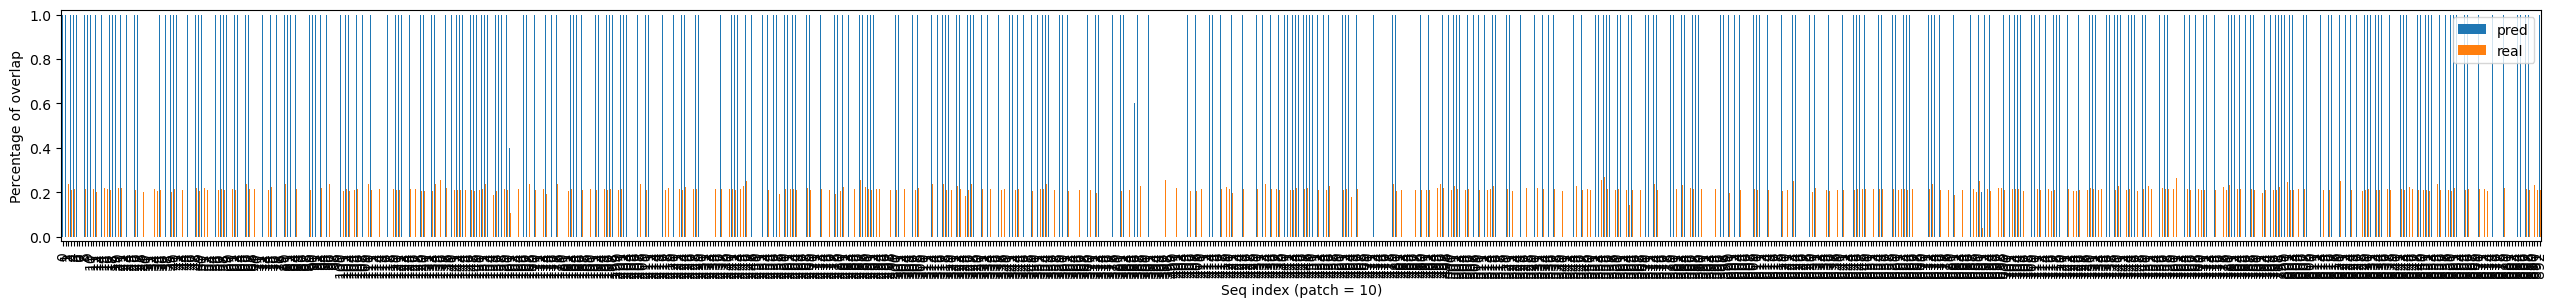

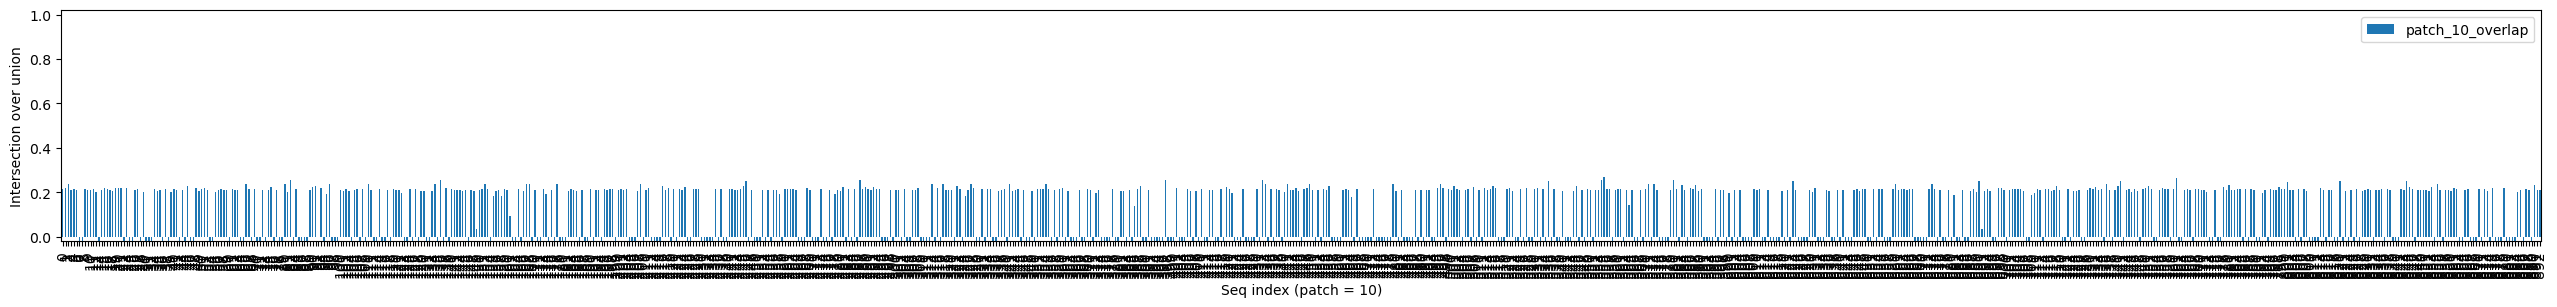

                                                                                           PATCH SIZE = 50


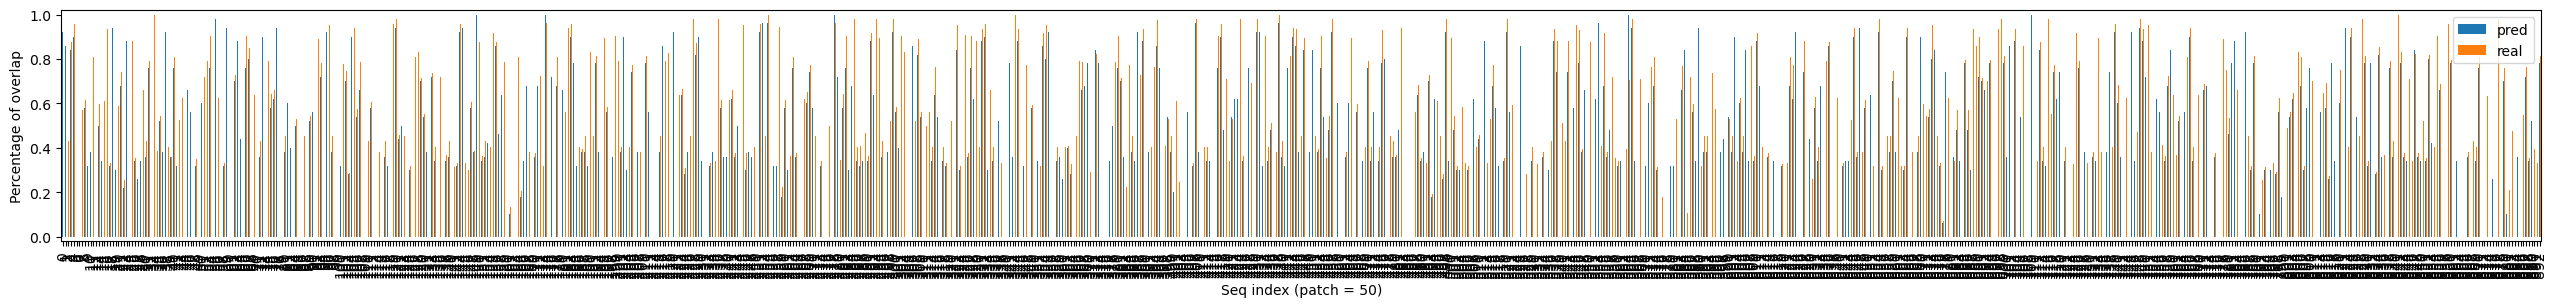

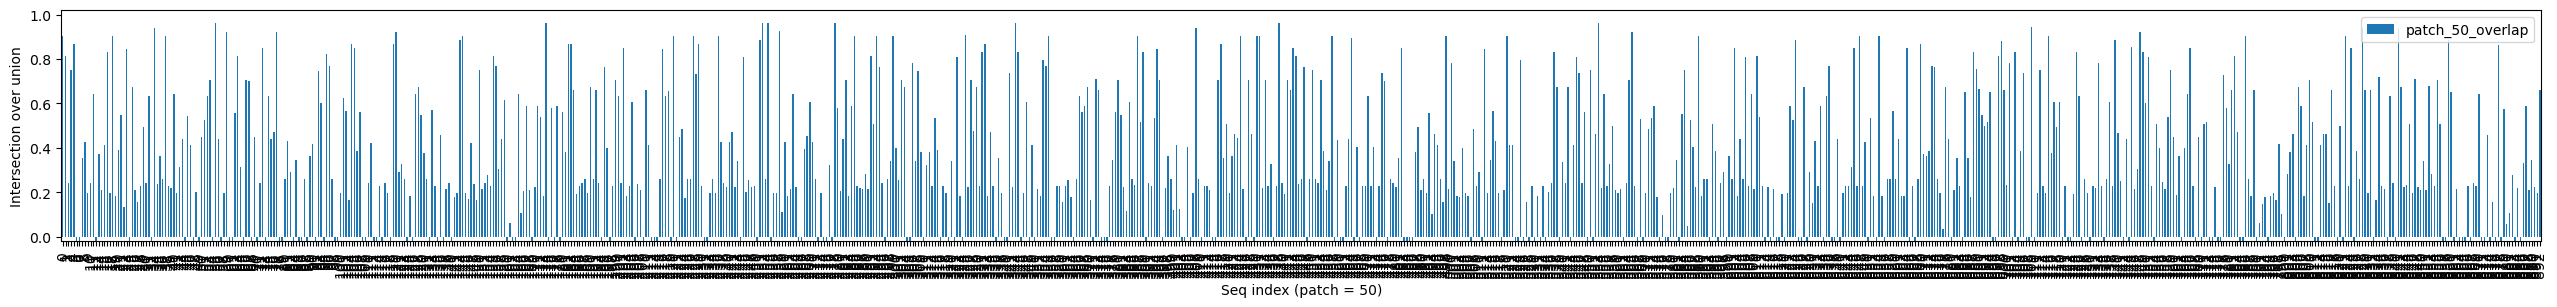

                                                                                           PATCH SIZE = 80


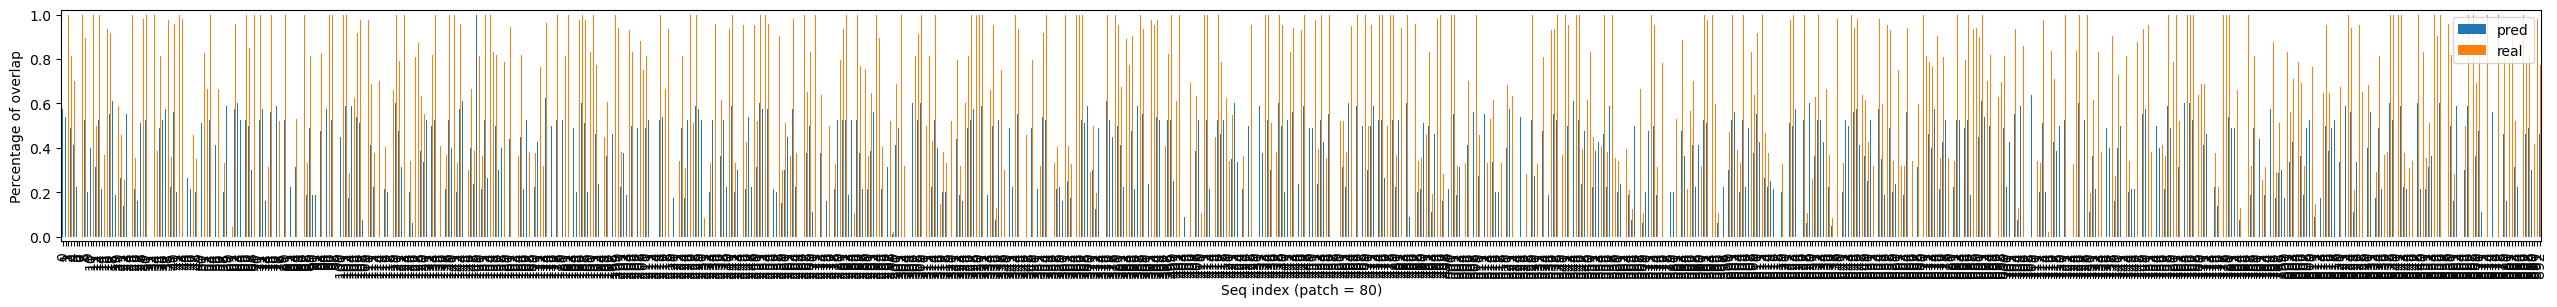

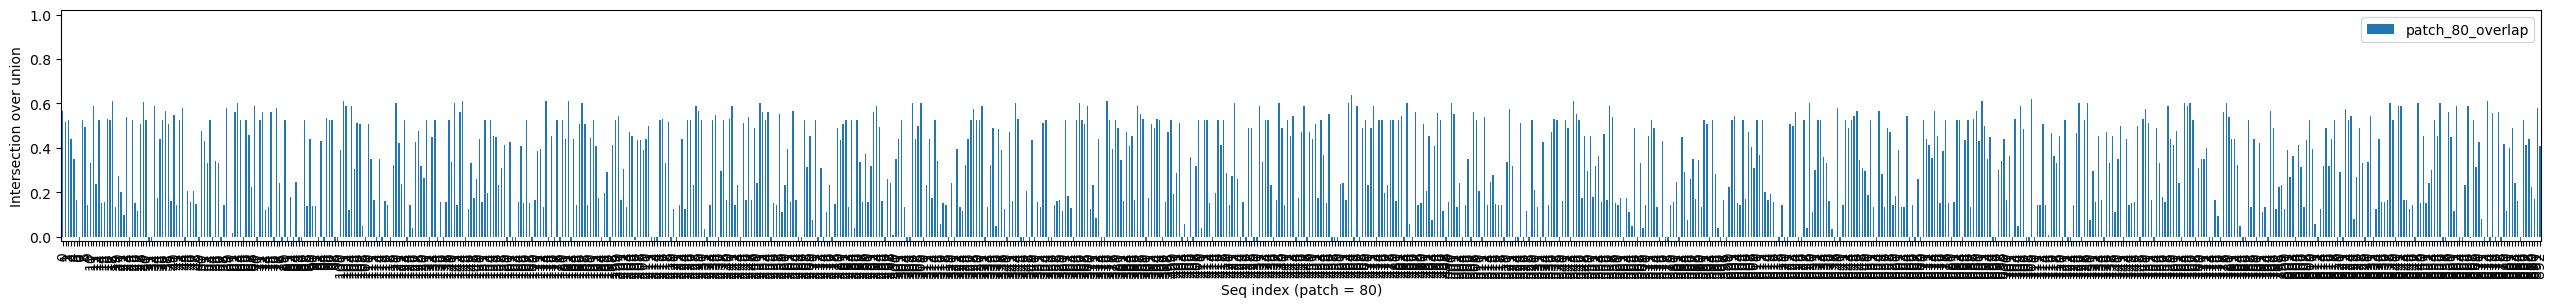

                                                                                           PATCH SIZE = 200


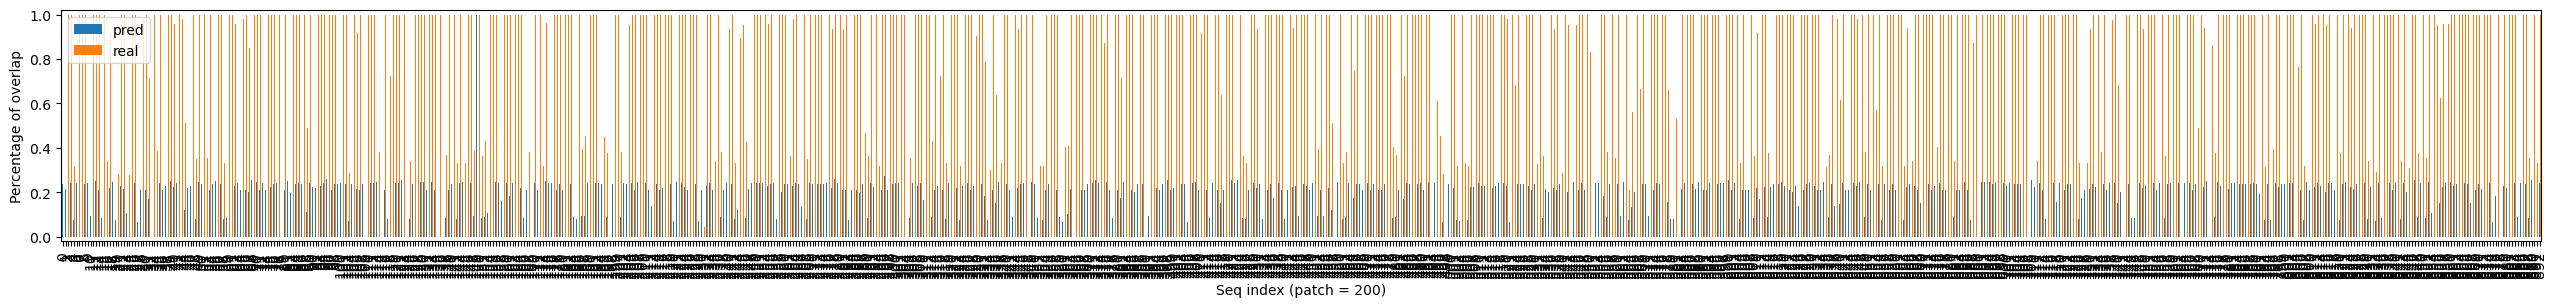

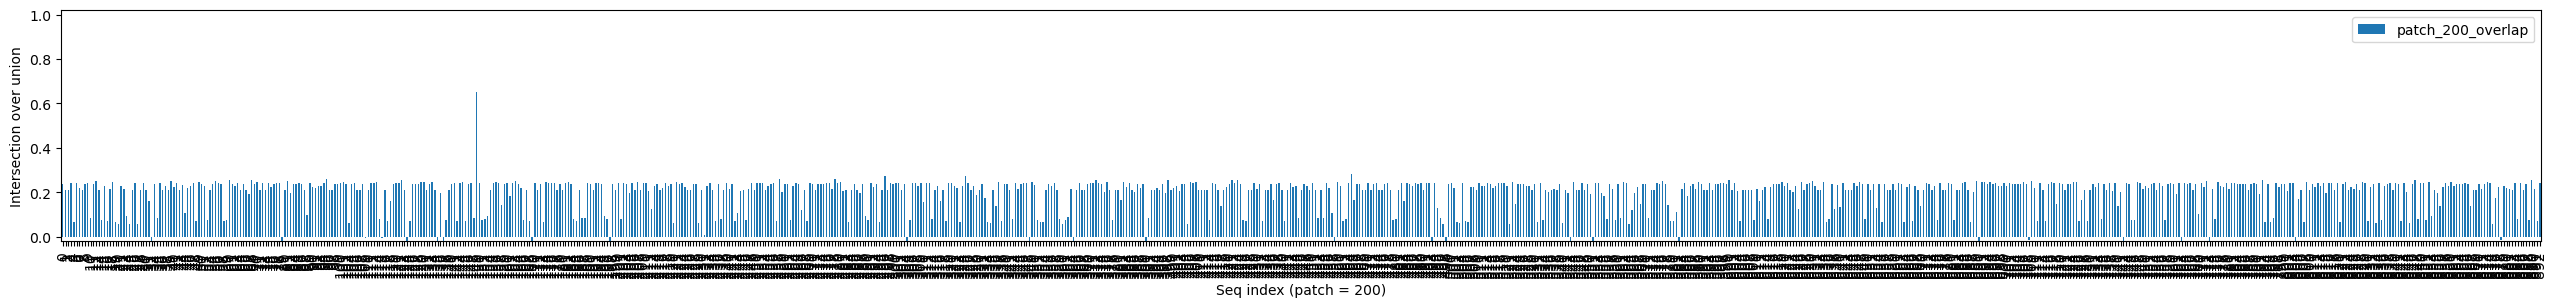

In [13]:
def plot_overlap_scores(patches, df):
    patches_len = len(patches)
    plt.rcParams['figure.figsize'] = (8 * patches_len, 3)

    for i in range(patches_len):
        patch_size = patches[i]
        print(' ' * 90 + f' PATCH SIZE = {patch_size}')

        ax = df.plot(x='index', y=[f'patch_{patch_size}_min_overlap_pred', f'patch_{patch_size}_min_overlap_real'], kind='bar', ylim=(-0.02,1.02)) # ylim to force y-axis scale to be the same as it is for the other graphs
        ax.legend(['pred', 'real'])
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Percentage of overlap')
        plt.show()
        
        ax = df.plot(x='index', y=[f'patch_{patch_size}_overlap'], kind='bar', ylim=(-0.02,1.02))
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Intersection over union')
        plt.show()

scores_df['index'] = scores_df.index
plot_overlap_scores(PATCH_SIZES, scores_df)

### Take percentage in consideration:

In [14]:
PREDICTION_THRESHOLD = 0.5

for patch_size in PATCH_SIZES: 
    print(f'Overall results for patch size ==== {patch_size} ====')
    
    # take only those where the prediction score dropped below some %: 
    df_below = scores_df.loc[scores_df[f'patch_{patch_size}_min_pred'] < PREDICTION_THRESHOLD]
    
    print('-- w.r.t. predicted length:')
    pred_mean = df_below[f'patch_{patch_size}_min_overlap_pred'].mean()
    print(f'Mean: {pred_mean}')
    pred_med = df_below[f'patch_{patch_size}_min_overlap_pred'].median()
    print(f'Med: {pred_med}')
    pred_max = df_below[f'patch_{patch_size}_min_overlap_pred'].max()
    print(f'Max: {pred_max}')
    pred_min = df_below[f'patch_{patch_size}_min_overlap_pred'].min()
    print(f'Min: {pred_min}')
    
    print('\n-- w.r.t. real length:')
    real_mean = df_below[f'patch_{patch_size}_min_overlap_real'].mean()
    print(f'Mean: {real_mean}')
    real_med = df_below[f'patch_{patch_size}_min_overlap_real'].median()
    print(f'Med: {real_med}')
    real_max = df_below[f'patch_{patch_size}_min_overlap_real'].max()
    print(f'Max: {real_max}')
    real_min = df_below[f'patch_{patch_size}_min_overlap_real'].min()
    print(f'Min: {real_min}')
    
    print('\n-- intersection over union:')
    real_mean = df_below[f'patch_{patch_size}_overlap'].mean()
    print(f'Mean: {real_mean}')
    real_med = df_below[f'patch_{patch_size}_overlap'].median()
    print(f'Med: {real_med}')
    real_max = df_below[f'patch_{patch_size}_overlap'].max()
    print(f'Max: {real_max}')
    real_min = df_below[f'patch_{patch_size}_overlap'].min()
    print(f'Min: {real_min}')
    
    print('----------------------------------------\n')

Overall results for patch size ==== 10 ====
-- w.r.t. predicted length:
Mean: 0.7399103139013453
Med: 1.0
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.157744404290576
Med: 0.20833333333333334
Max: 0.2702702702702703
Min: 0.0

-- intersection over union:
Mean: 0.054527904137205395
Med: 0.20833333333333334
Max: 0.2702702702702703
Min: -0.6779661016949152
----------------------------------------

Overall results for patch size ==== 50 ====
-- w.r.t. predicted length:
Mean: 0.4372727272727273
Med: 0.38
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.4741702789350084
Med: 0.42857142857142855
Max: 1.0
Min: 0.0

-- intersection over union:
Mean: 0.29206054404589454
Med: 0.25158227848101267
Max: 0.9615384615384616
Min: -0.5683760683760684
----------------------------------------

Overall results for patch size ==== 80 ====
-- w.r.t. predicted length:
Mean: 0.33665492957746473
Med: 0.4
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.5894127129160434
Med: 0.6666666666666666
Max: 1.0
Min

In [15]:
get_simple_results_positive(df_below)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,510,0.580866,0,0.000000,0,0.0
1,50,6,0.006834,7,0.007973,0,0.0
2,80,0,0.000000,169,0.192483,0,0.0
3,200,0,0.000000,625,0.711845,0,0.0


In [16]:
# compare with results when the prediction was not taken into consideration:
get_simple_results_positive(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,520,0.582307,0,0.000000,0,0.0
1,50,7,0.007839,7,0.007839,0,0.0
2,80,1,0.001120,174,0.194849,0,0.0
3,200,1,0.001120,637,0.713326,0,0.0


In [17]:
get_simple_results_negative(df_below)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,364,0.414579,365,0.415718,363,0.413440
1,50,203,0.231207,202,0.230068,201,0.228929
2,80,187,0.212984,173,0.197039,166,0.189066
3,200,153,0.174260,26,0.029613,25,0.028474


In [18]:
get_simple_results_negative(scores_df)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,10,369,0.413214,371,0.415454,368,0.412094
1,50,205,0.229563,204,0.228443,203,0.227324
2,80,190,0.212766,175,0.195969,168,0.188130
3,200,154,0.172452,27,0.030235,26,0.029115


                                                                                           PATCH SIZE = 10


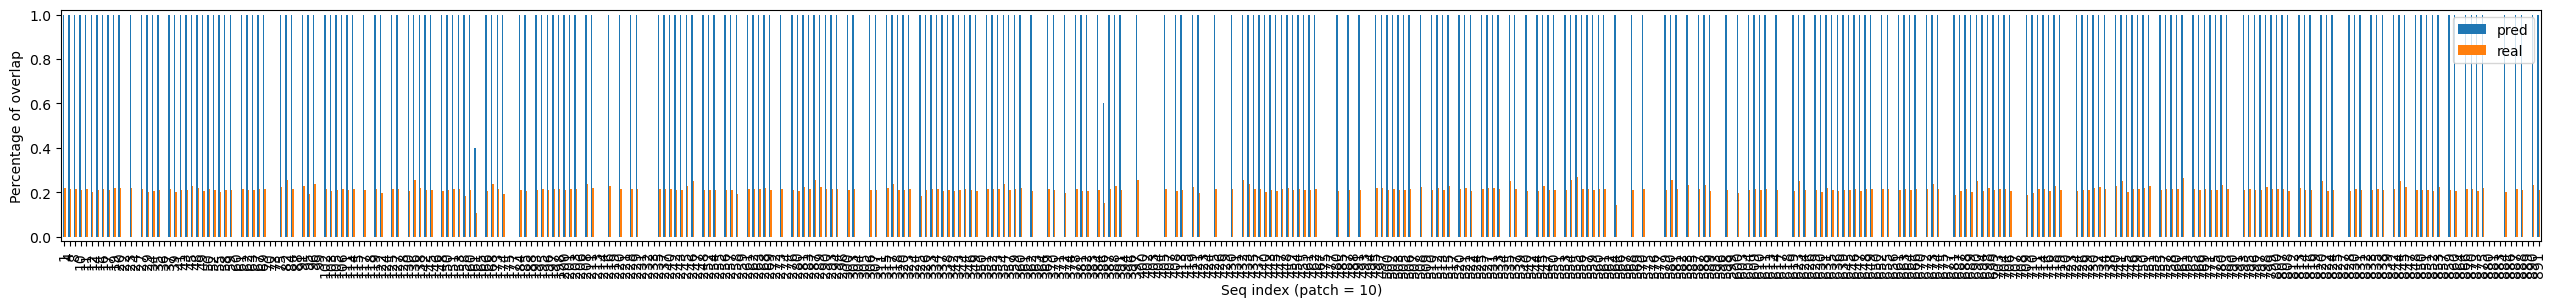

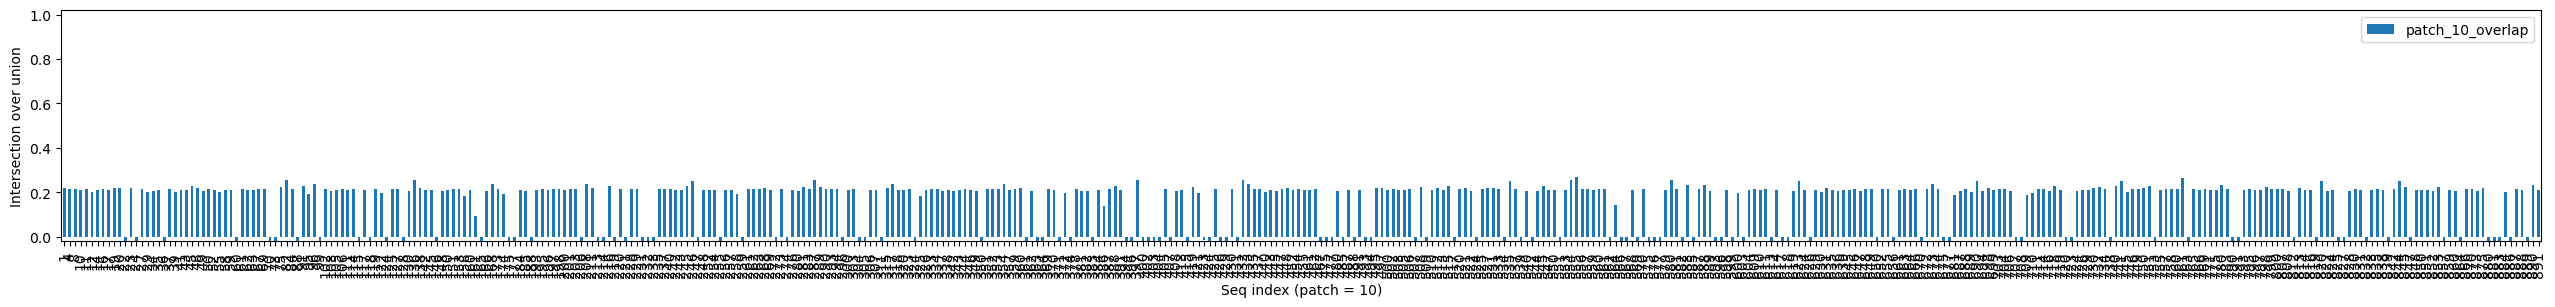

                                                                                           PATCH SIZE = 50


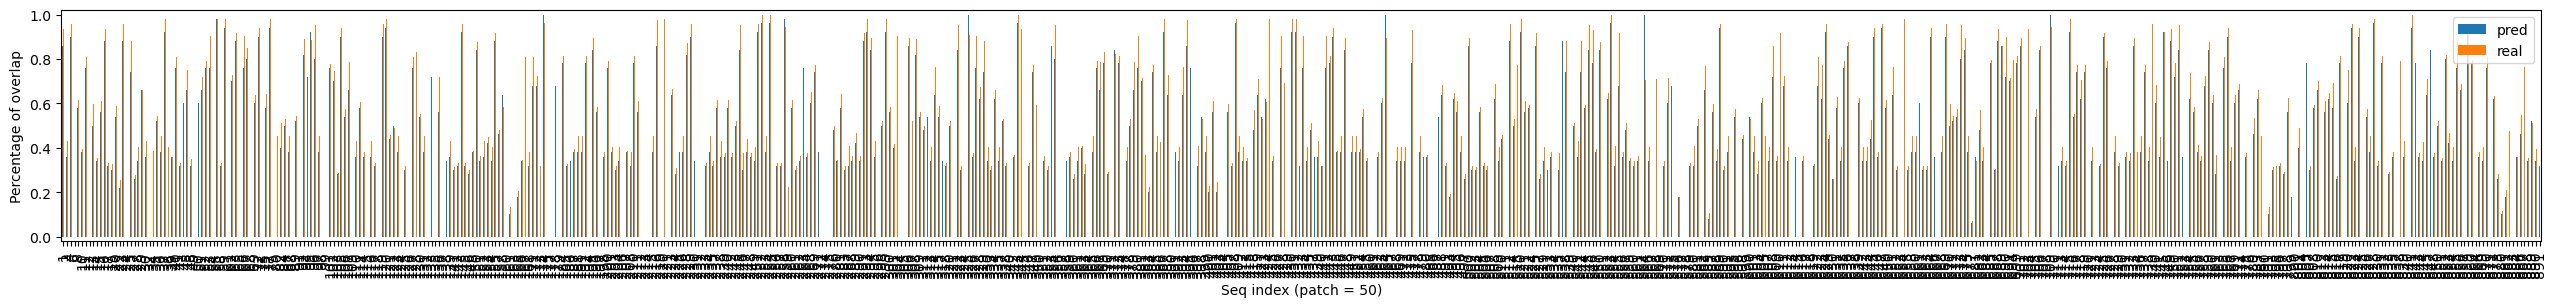

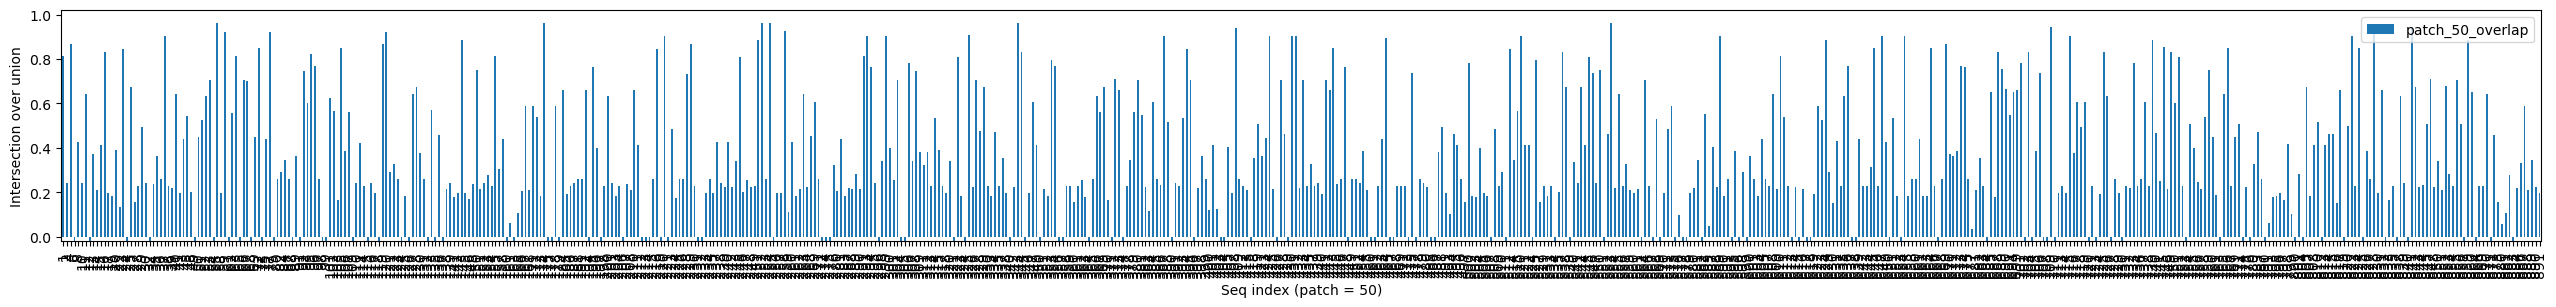

                                                                                           PATCH SIZE = 80


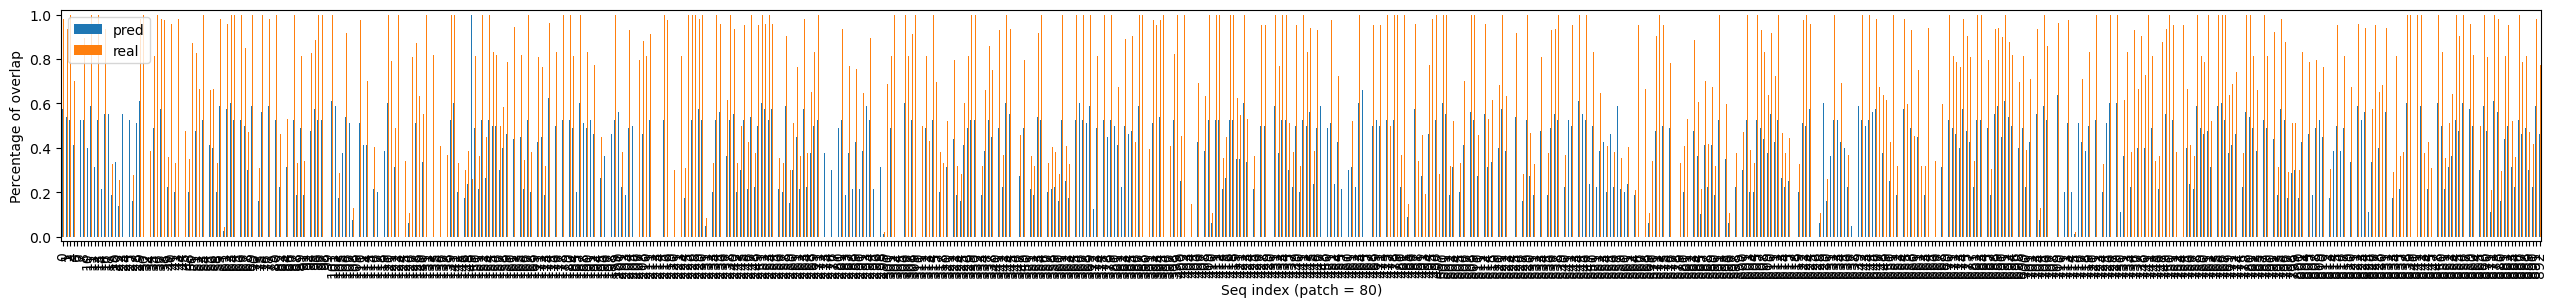

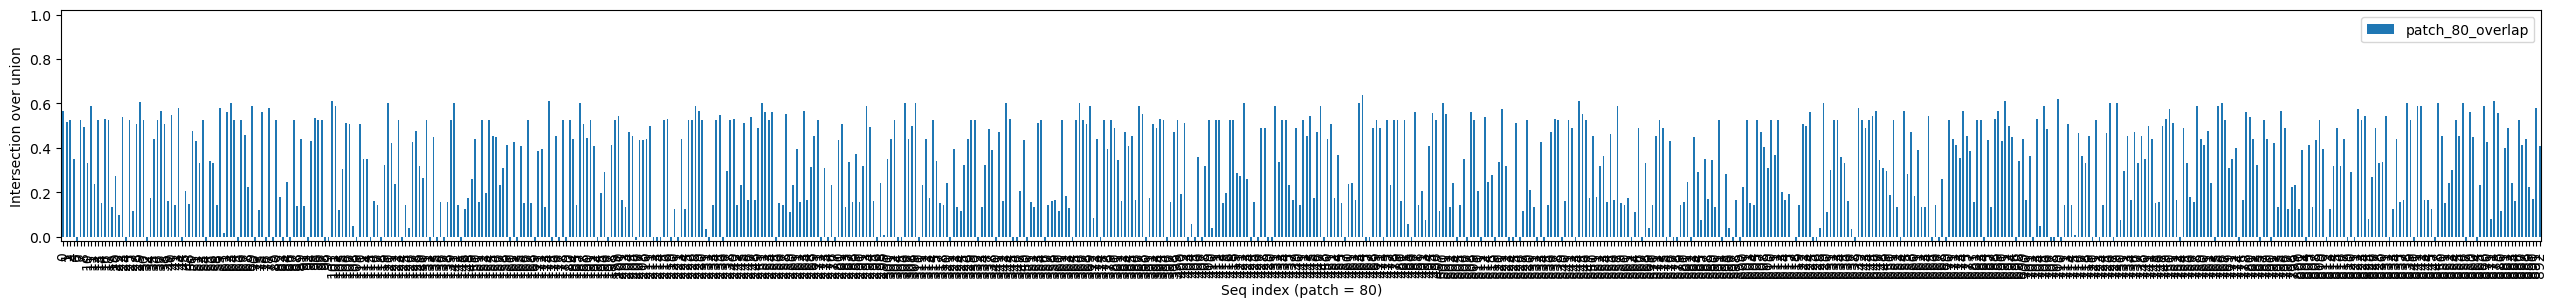

                                                                                           PATCH SIZE = 200


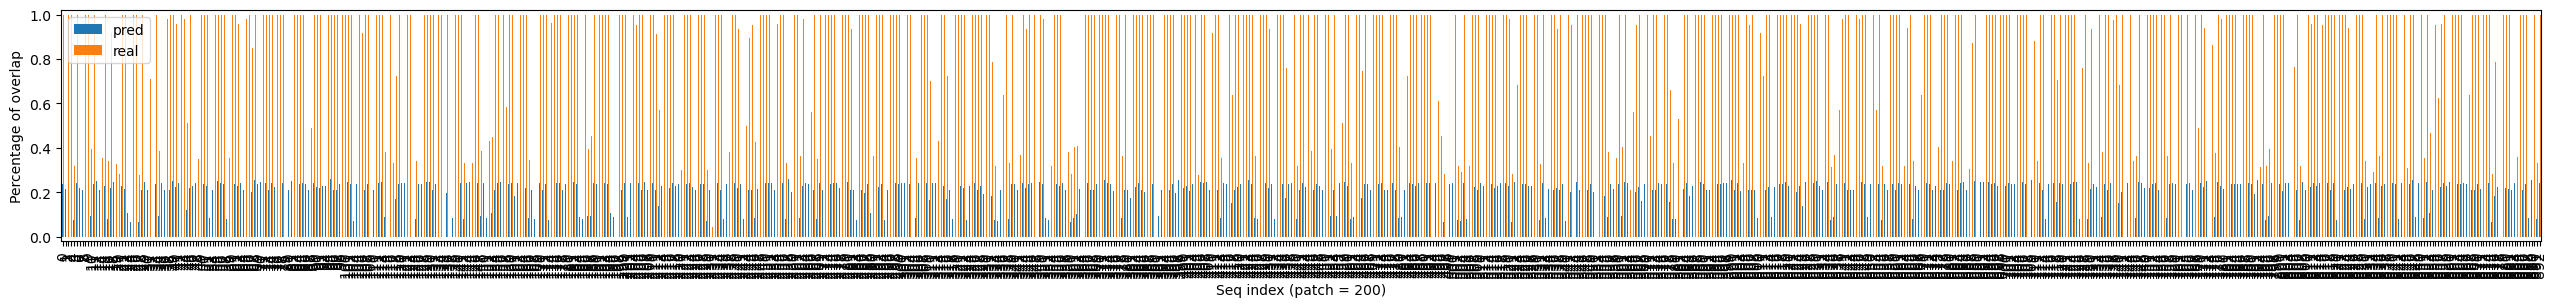

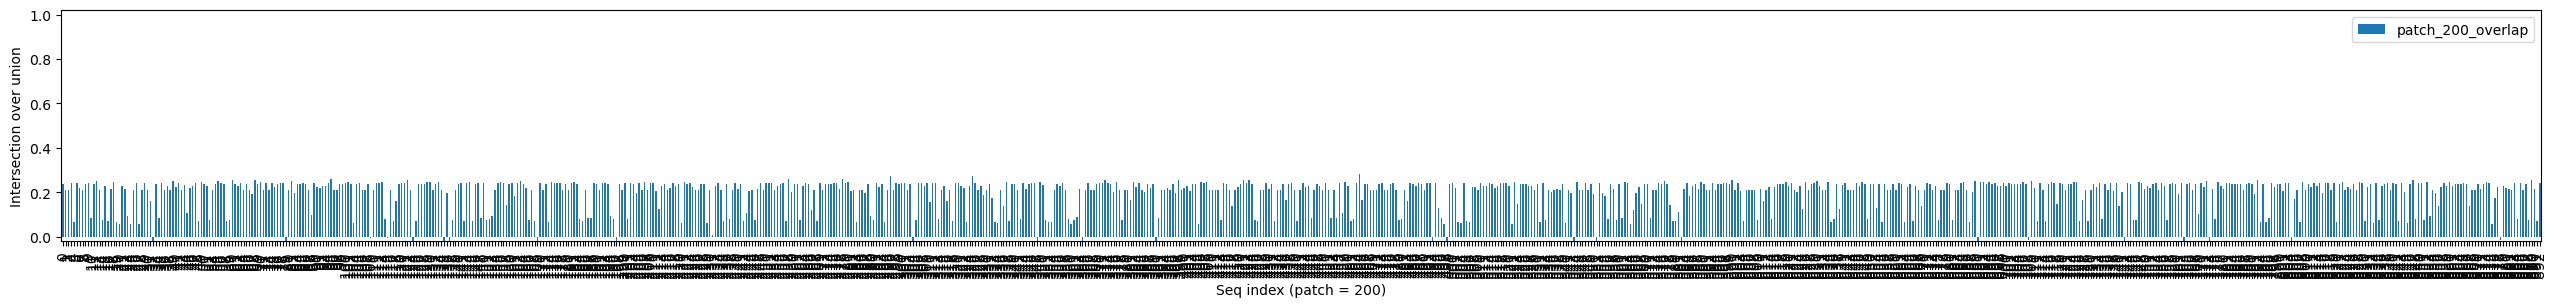

In [20]:
def plot_overlap_scores(patches, df):
    patches_len = len(patches)
    plt.rcParams['figure.figsize'] = (8 * patches_len, 3)

    for i in range(patches_len):
        patch_size = patches[i]
        print(' ' * 90 + f' PATCH SIZE = {patch_size}')
        
        df_below = scores_df.loc[scores_df[f'patch_{patch_size}_min_pred'] < PREDICTION_THRESHOLD]

        ax = df_below.plot(x='index', y=[f'patch_{patch_size}_min_overlap_pred', f'patch_{patch_size}_min_overlap_real'], kind='bar', ylim=(-0.02,1.02)) # ylim to force y-axis scale to be the same as it is for the other graphs
        ax.legend(['pred', 'real'])
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Percentage of overlap')
        plt.show()
        
        ax = df_below.plot(x='index', y=[f'patch_{patch_size}_overlap'], kind='bar', ylim=(-0.02,1.02))
        ax.set_xlabel(f'Seq index (patch = {patch_size})')
        ax.set_ylabel('Intersection over union')
        plt.show()

plot_overlap_scores(PATCH_SIZES, scores_df)

In [21]:
scores_df.drop(['index'], axis=1, inplace=True)
scores_df.to_csv(OUTPUT, index=False)